In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### Data Cleaning
1. Handling missing values
2. Handling duplicates
3. Check data type
4. understand the data

### Handling missing values

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Checking all categories

In [5]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

In [8]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [9]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [10]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

### Check Missing Values

getting all the columns with missing values

In [11]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

In [12]:
for feature in features_with_na:
    print(f" {feature} has {np.round(df[feature].isnull().mean()*100,1)} % missing values")

 Age has 4.6 % missing values
 TypeofContact has 0.5 % missing values
 DurationOfPitch has 5.1 % missing values
 NumberOfFollowups has 0.9 % missing values
 PreferredPropertyStar has 0.5 % missing values
 NumberOfTrips has 2.9 % missing values
 NumberOfChildrenVisiting has 1.4 % missing values
 MonthlyIncome has 4.8 % missing values


Stats on numerical cols, for null columns

In [13]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


We can see the 50th Percentile and mean are not much different, meaning the outliers are there but less

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [15]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

Replacing missing int values with median and categorical values with mode

In [17]:
df.Age.fillna(df.Age.median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3840\2661029692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)


In [18]:
df['TypeofContact'].mode()

0    Self Enquiry
Name: TypeofContact, dtype: object

In [19]:
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3840\794420813.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)


In [20]:
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3840\4262229188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)


In [21]:
df.DurationOfPitch.median()

np.float64(13.0)

In [22]:
df['PreferredPropertyStar'].isnull().sum()

np.int64(26)

In [23]:
df['NumberOfFollowups'].fillna(df.NumberOfFollowups.mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3840\3165026026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfFollowups'].fillna(df.NumberOfFollowups.mode()[0], inplace=True)


In [24]:
df['PreferredPropertyStar'].fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3840\3520292543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PreferredPropertyStar'].fillna(df.PreferredPropertyStar.mode()[0], inplace=True)


In [25]:
df['NumberOfTrips'].fillna(df.NumberOfTrips.median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3840\3026460079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NumberOfTrips'].fillna(df.NumberOfTrips.median(), inplace=True)


In [26]:
df.NumberOfTrips.isnull().sum()

np.int64(0)

In [27]:
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3840\1911819960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)


In [28]:
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3840\3937586248.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)


In [29]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [30]:
df.drop('CustomerID', axis=1, inplace=True)

In [31]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [32]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

### Feature Engineering

Combining the columns "Number of Person Visiting" and "No of Children Visiting"

In [34]:
df[['NumberOfPersonVisiting']]

,NumberOfPersonVisiting
0,3
1,3
2,3
3,2
4,2
...,...
4883,3
4884,4
4885,4
4886,3


In [35]:
df[['NumberOfChildrenVisiting']]

,NumberOfChildrenVisiting
0,0.0
1,2.0
2,0.0
3,1.0
4,0.0
...,...
4883,1.0
4884,2.0
4885,3.0
4886,2.0


In [36]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']

In [37]:
df[['TotalVisiting']]

,TotalVisiting
0,3.0
1,5.0
2,3.0
3,3.0
4,2.0
...,...
4883,4.0
4884,6.0
4885,7.0
4886,5.0


In [38]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [39]:
df.drop(columns= ['NumberOfChildrenVisiting','NumberOfPersonVisiting'], axis=1, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

Get all Numeric feature

In [41]:
numerical_features = [cols for cols in df.columns if df[cols].dtype != 'O']
print(f"Number of numerical features is {len(numerical_features)}")

Number of numerical features is 12


Get all categorical features

In [42]:
categorical_features = [cols for cols in df.columns if df[cols].dtype == 'O']
print(f"Number of numerical features is {len(categorical_features)}")

Number of numerical features is 6


Get all Discrete features: Categorical features has 1 or 2 categories whereas discrete features has like 10 or 20 categories not more than that example : pincode

In [43]:
for feature in numerical_features:
    if len(df[feature].unique()) <= 25:
        print(feature)

ProdTaken
CityTier
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
TotalVisiting


In [44]:
dicrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]
print(f"Number of discrete features {len(dicrete_features)}")

Number of discrete features 9


Getting continuous feature - Features that has more than 25 categories 

In [45]:
continuous_feature = [feature for feature in numerical_features if feature not in dicrete_features]
print(f"Number of continuos features is {len(continuous_feature)}")

Number of continuos features is 3


### Transforming Categorical/Discrete/Continuous features to numerical

#### Train Test Split and Model Selection

In [46]:
df[['ProdTaken']].value_counts()

ProdTaken
0            3968
1             920
Name: count, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop('ProdTaken', axis=1)

In [49]:
y = df['ProdTaken']

In [50]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [51]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [53]:
X_train.shape, y_train.shape

((3910, 17), (3910,))

#### Handling categorical features

Categorical features are of object type

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [55]:
cat_features = X.select_dtypes(include='object').columns
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

Numerical features are not object types

In [56]:
num_features = X.select_dtypes(exclude='object').columns
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

Encoding/standard scaler/Column Transformer -  the categorical features

Create a column transformer with 3 types of transformer

In [57]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [58]:
numeric_transformer = StandardScaler()

In [59]:
oh_transformer = OneHotEncoder(drop='first')

In [60]:
preprocessor = ColumnTransformer([
    ('OneHotEncoder', oh_transformer, cat_features),
    ('StandardScaler', numeric_transformer, num_features)
])

In [61]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

Applying fit transform on training data

In [62]:
X_train = preprocessor.fit_transform(X_train)

In [63]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


Applying transform on test data

In [64]:
X_test = preprocessor.transform(X_test)

### Model Training - Random forest classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [67]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()


}

In [68]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training Set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    #Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('Model Performance for Training Set')
    print('-Accuracy: {:.4f}'.format(model_train_accuracy))
    print('-F1 Score: {:.4f}'.format(model_train_f1))
    print('-Precision: {:.4f}'.format(model_train_precision))
    print('-Recall: {:.4f}'.format(model_train_recall))
    print('-Roc Auc score: {:.4f}'.format(model_train_rocauc_score))

    print('------------------------------------')

    print('Model Performance for Test Set')
    print('-Accuracy: {:.4f}'.format(model_test_accuracy))
    print('-F1 Score: {:.4f}'.format(model_test_f1))
    print('-Precision: {:.4f}'.format(model_test_precision))
    print('-Recall: {:.4f}'.format(model_test_recall))
    print('-Roc Auc score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Random Forest
Model Performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc score: 1.0000
------------------------------------
Model Performance for Test Set
-Accuracy: 0.9315
-F1 Score: 0.9269
-Precision: 0.9559
-Recall: 0.6806
-Roc Auc score: 0.8365


Decision Tree
Model Performance for Training Set
-Accuracy: 1.0000
-F1 Score: 1.0000
-Precision: 1.0000
-Recall: 1.0000
-Roc Auc score: 1.0000
------------------------------------
Model Performance for Test Set
-Accuracy: 0.9213
-F1 Score: 0.9204
-Precision: 0.8167
-Recall: 0.7696
-Roc Auc score: 0.8639


Logistic Regression
Model Performance for Training Set
-Accuracy: 0.8460
-F1 Score: 0.8202
-Precision: 0.7016
-Recall: 0.3032
-Roc Auc score: 0.6368
------------------------------------
Model Performance for Test Set
-Accuracy: 0.8364
-F1 Score: 0.8087
-Precision: 0.6914
-Recall: 0.2932
-Roc Auc score: 0.6307




### Random forest hyperparameter tuning

In [71]:
rf_params = {
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split': [2,8,15,20],
    'n_estimators':[100,200,500,1000]
}

In [72]:
randomcv_models = [
    ('RF', RandomForestClassifier(), rf_params)
]

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100,cv=3, verbose=2, n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-------------------Best params for {model_name}--------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=1000; total time=   5.8s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=1000; total time=   7.6s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=1000; total time=   5.6s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=1000; total time=   6.2s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=1000; total time=   5.3s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=1000; total time=   6.5s
[CV] END max_depth=10, max_feature

d:\Nivee\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Nivee\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Nivee\myenv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\Nivee\myenv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "d:\Nivee\myenv\Lib\site-packages\sklearn\utils\_param_validation.py", line 98, in 

-------------------Best params for RF--------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


With the obtained best params, rechecking the accuracy

In [80]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=1000, min_samples_split=2,max_features=8,max_depth=15)


}

In [81]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Training Set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    #Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    
    print('Model Performance for Training Set')
    print('-Accuracy: {:.4f}'.format(model_train_accuracy))
    print('-F1 Score: {:.4f}'.format(model_train_f1))
    print('-Precision: {:.4f}'.format(model_train_precision))
    print('-Recall: {:.4f}'.format(model_train_recall))
    print('-Roc Auc score: {:.4f}'.format(model_train_rocauc_score))

    print('------------------------------------')

    print('Model Performance for Test Set')
    print('-Accuracy: {:.4f}'.format(model_test_accuracy))
    print('-F1 Score: {:.4f}'.format(model_test_f1))
    print('-Precision: {:.4f}'.format(model_test_precision))
    print('-Recall: {:.4f}'.format(model_test_recall))
    print('-Roc Auc score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')


Random Forest
Model Performance for Training Set
-Accuracy: 0.9990
-F1 Score: 0.9990
-Precision: 1.0000
-Recall: 0.9945
-Roc Auc score: 0.9973
------------------------------------
Model Performance for Test Set
-Accuracy: 0.9315
-F1 Score: 0.9267
-Precision: 0.9627
-Recall: 0.6754
-Roc Auc score: 0.8345




### Plot ROC AUC Curve

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

In [86]:

auc_models = [{
    'label':'Random forest classifier',
    'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=7, max_depth=None),
    'auc':0.8345
}]

Create loop through all model

Compute False Positive rate and True Positive rate

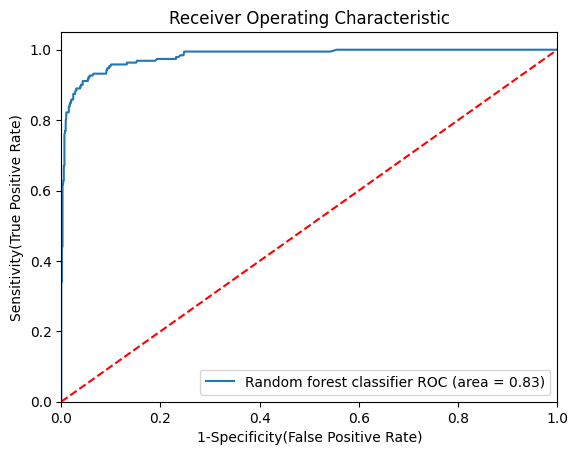

In [87]:
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 